In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from scipy.interpolate import UnivariateSpline
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, peak_widths

plt.rcParams.update({"font.size" : 16, "font.family" : "serif"})

In [2]:
L = 1
c = 3e8
fsr = c/(2*L)

In [3]:
data = pd.read_csv("./data_17.01.2022/o.csv", sep=",")
data

,Time [s],CH0 [V],CH1 [V],Unnamed: 3
0,1.792000,-0.320,0.88,NaN
1,1.792008,-0.320,0.88,NaN
2,1.792016,-0.320,0.88,NaN
3,1.792024,-0.320,0.88,NaN
4,1.792032,-0.320,0.88,NaN
...,...,...,...,...
3995,1.823960,-0.048,4.56,NaN
3996,1.823968,-0.056,4.56,NaN
3997,1.823976,-0.056,4.56,NaN
3998,1.823984,-0.048,4.56,NaN


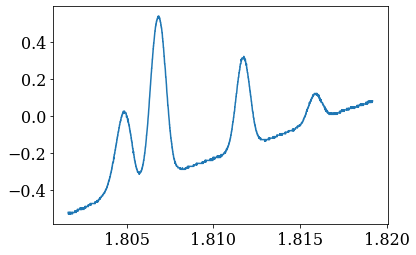

In [4]:
x, y = data["Time [s]"], data["CH0 [V]"]
left, right = 1200, 3400
x, y = np.array(x[left:right]), np.array(y[left:right])
plt.plot(x, y)

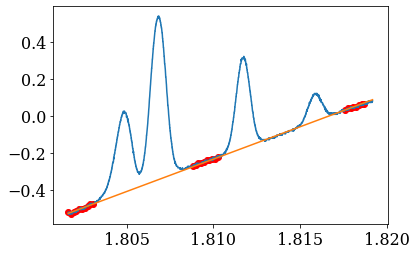

In [5]:
idx = np.append(np.arange(0, 200, 20), np.arange(2000, 2150, 20))
idx = np.append(idx, np.arange(900, 1100, 20))

plt.plot(x, y)
plt.scatter(x[idx], y[idx], color="red")
k, b = np.polyfit(x[idx], y[idx], deg=1)
plt.plot(x, k*x+b)

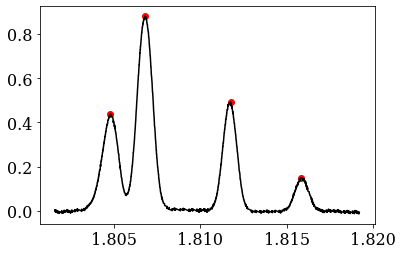

In [6]:
y_new = y - k*x-b
plt.plot(x, y_new, color="black")
peaks, _ = find_peaks(y_new, distance=150, height=0.15)
plt.scatter(x[peaks], y_new[peaks], color="red")

6.839141513541123
3.0677018817985156


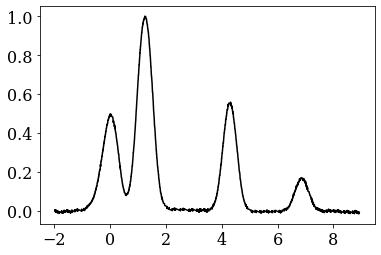

In [7]:
x_new = x - x[peaks[0]]
x_new /= x_new[peaks[-1]]
x_new *= 6.8391415135411231
y_new /= np.max(y_new)
plt.plot(x_new, y_new, color="black")

print(x_new[peaks[-1]] - x_new[peaks[0]])
print(x_new[peaks[2]] - x_new[peaks[1]])

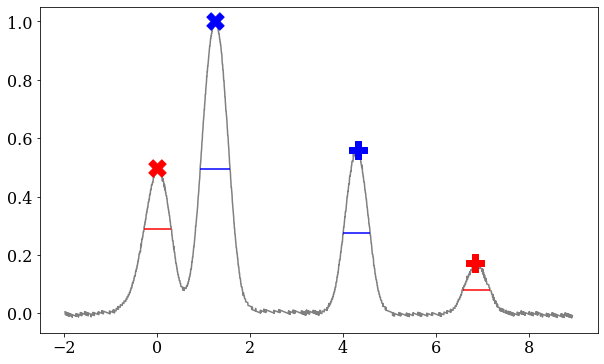

In [8]:

color=["red", "blue", "blue", "red"]
mark = ["X", "X", "P", "P"]
# print(len(y))


idx, _ = find_peaks(y_new, distance=200, height=0.15)
width, height, left, right = peak_widths(y_new, idx, rel_height=0.5)

# plt.scatter(nu[idx], y[idx], color="red")

# # display(nu[idx], y[idx])
# step = x_new[20]-x_new[19]
# nu = (x_new-x_new[idx[0]])*coef2

left, right = np.array(np.round(left), dtype=int), np.array(np.round(right), dtype=int)
# print(left)
# print(right)
# print(height)

plt.figure(figsize=(10, 6))
plt.plot(x_new, y_new, color="gray", zorder=-1)
for l, r, h, i, c, m in zip(left, right, height, idx, color, mark):
    plt.scatter(x_new[i], y_new[i], marker=m,color=c, s=300, label="FWHM = {} GHz, Rel.height = {}".format(round((x_new[r]-x_new[l]), 1), round(2*h,1)))
    plt.hlines(y=h, xmin=x_new[l], xmax=x_new[r], color=c)
    
    
# # plt.annotate(text=" $^{85}$Rb"+"\n $\\Delta_g = (3.0 \\pm 0.7)\; $GHz", xy=(-8.0, 0.6))
# # plt.annotate(text=" $^{87}$Rb"+"\n $\\Delta_g = (6.5 \\pm 0.8)\; $GHz", xy=(12, 0.4))
# plt.xlabel("$\\nu$, GHz")
# plt.ylabel("Relative intensity                               ")
# plt.title("Rubidium spectum")
# plt.ylim(0.0, 2.0)
# plt.yticks(np.arange(0.0, 1.2, 0.2))
# # plt.xticks(np.arange(-6, 22, 2))

# plt.annotate(text="$^{87}$Rb, F=2", xy=(-2.0, 0.55))
# plt.annotate(text="$^{85}$Rb, F=3", xy=(-0.2, 1.1))
# plt.annotate(text="$^{87}$Rb, F=1", xy=(7.0, 0.25))
# plt.annotate(text="$^{85}$Rb, F=2", xy=(3.8, 0.4))

# plt.scatter(m1/1e9, 0.05, color="red", s=200, marker="d")
# plt.scatter(m2/1e9, 0.05, color="blue", s=200, marker="d")


# plt.legend()

In [9]:
def doppler(x, g, a, m):
    return a*np.exp(-(x-m)**2/(2*g**2))


def gaussians(x, g1, a1, m1, g2, a2, m2, g3, a3, m3, g4, a4, m4):
    return doppler(x, g1, a1, m1) + doppler(x, g2, a2, m2) + doppler(x, g3, a3, m3) + doppler(x, g4, a4, m4)

[0.66581604 0.62211671 0.56653646 0.55564944]
[0.48610238 1.         0.55321235 0.1664433 ]
[0.         1.24661998 4.28387287 6.85918823]


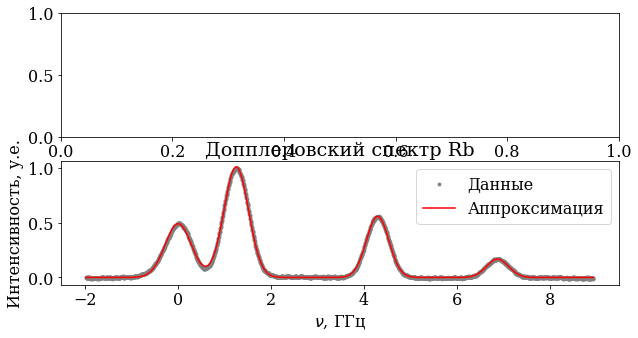

In [10]:
popt, pcov = curve_fit(gaussians, x_new, y_new, p0=[0.5, 0.5, 0.0,   0.5,  1.0, 1.7,   0.5, 0.6, 4.7,   0.5, 0.2,6.83])


plt.figure(figsize=(10, 5))

plt.subplot(211)


plt.subplot(212)
plt.scatter(x_new, y_new, color="grey", s=8, label="Данные")
plt.plot(x_new, gaussians(x_new, *popt), color="red", label="Аппроксимация")


g1, a1, m1, g2, a2, m2, g3, a3, m3, g4, a4, m4 = popt
sg1, sa1, sm1, sg2, sa2, sm2, sg3, sa3, sm3, sg4, sa4, sm4 = np.diag(pcov)**0.5
G = np.array([g1, g2, g3, g4])*np.sqrt(8*np.log(2))
A = np.array([a1, a2, a3, a4]) 
A /= np.max(A)
M = np.array([m1, m2, m3, m4]) - m1
print(G)
print(A)
print(M)

plt.xlabel("$\\nu$, ГГц")
plt.ylabel("Интенсивность, у.е.")
plt.title("Допплеровский спектр Rb")
plt.legend()

# plt.savefig("./images/doppler_appr.pdf")

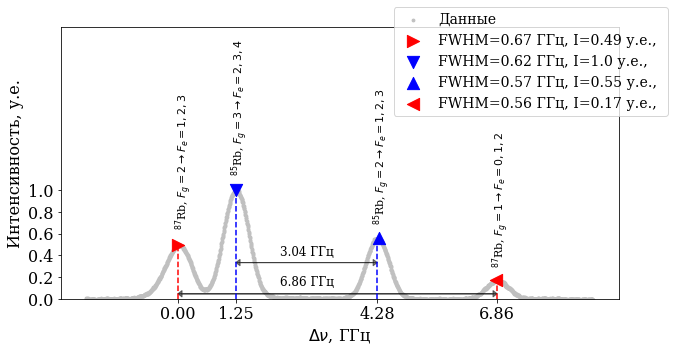

In [107]:
plt.figure(figsize=(10, 5))
plt.scatter(x_new, y_new, color="silver", s=8, label="Данные", alpha=1.0)



markers = [">", "v", "^", "<"]
colors = ["red", "blue", "blue", "red"]
for p, g, a, m, c, mark in zip(peaks, G, A, M, colors, markers):
    plt.scatter(x_new[p], y_new[p], s=150, label="FWHM={} ГГц, I={} у.е., ".format(round(g, 2), round(a, 2)), marker=mark, color=c)
    plt.vlines(m, 0, a, color=c, linestyle="--")
    
plt.legend(fontsize=14,loc='best', bbox_to_anchor=(0.6, 0.6, 0.5, 0.5))
plt.xlabel("$\\Delta \\nu$, ГГц")
plt.ylabel("Интенсивность, у.е.")
plt.ylim(0.0, 2.5)
# plt.yticks(np.arange(0.0, 1.1, 0.2))
plt.xticks(np.round(M, 2))
plt.yticks(np.arange(0.0, 1.1, 0.2))
# plt.title("Спектр переходов $5^2S_{1/2}, F_g \\rightarrow 5^2P_{3/2}, F_e$")

plt.annotate(text="$^{87}$Rb, " + "$F_g=2\\rightarrow F_e=1,2,3$", xy=(-0.1, 0.7), rotation=90, fontsize=11)
plt.annotate(text="$^{85}$Rb, " + "$F_g=3\\rightarrow F_e=2,3,4$", xy=(1.1, 1.2), rotation=90, fontsize=11)
plt.annotate(text="$^{87}$Rb, " + "$F_g=1\\rightarrow F_e=0,1,2$", xy=(6.7, 0.35), rotation=90,fontsize=11)
plt.annotate(text="$^{85}$Rb, " + "$F_g=2\\rightarrow F_e=1,2,3$", xy=(4.15, 0.75), rotation=90,fontsize=11)




plt.arrow(x=M[0], y=A[3]-0.12, dx=M[3], dy=0, length_includes_head=True, shape="full", head_width=0.06, color="black", width=0.00005, alpha=0.5)
plt.arrow(x=M[3], y=A[3]-0.12, dx=-M[3], dy=0, length_includes_head=True, shape="full", head_width=0.06, color="black", width=0.00005, alpha=0.5)
plt.annotate(text="{} ГГц".format(round(M[2]-M[1], 2)), xy=(2.2, 0.4), fontsize=12)

plt.arrow(x=M[1], y=A[2]-0.22, dx=M[2]-M[1], dy=0, length_includes_head=True, shape="full", head_width=0.06, color="black", width=0.00005, alpha=0.5)
plt.arrow(x=M[2], y=A[2]-0.22, dx=-M[2]+M[1], dy=0, length_includes_head=True, shape="full", head_width=0.06, color="black", width=0.00005, alpha=0.5)
plt.annotate(text="{} ГГц".format(round(M[3]-M[0], 2)), xy=(2.2, 0.12), fontsize=12)


# plt.savefig("/Users/goloshch/Desktop/Материалы/ВПВ/SaturatedRb/images/doppler_spectrum.pdf")
plt.savefig("/Users/goloshch/Desktop/Материалы/КРФ ФИАН/SaturatedRb_ВПВ/Тезис/doppler.pdf")

In [ ]:
###Doppler shifts(theor)

nu0 = 384.230e12
c = 3e8
k = 1.38e-23
T = 300
m = 86.2 * 1.66e-27

dnu = 2 * nu0/c * np.sqrt(2*k*T*np.log(2)/m)
dnu / 1e9



###Doppler shift(experimental)
# print(g1, sg1)
print(dnu/1e9)

In [12]:
###Distance between levels
d87 = m4 - m1
sd87 = 3 * np.sqrt((sm1**2 + sm4**2))

d85 = m3-m2
sd85 = 3 * np.sqrt((sm3**2 + sm2**2))

print(d85, d87)
print(dnu/2e9, dnu/2e9)

3.0372528921276203 6.859188225344396


NameError: name 'dnu' is not defined

In [306]:
###Isotopes
part85 = (A[1] + A[2])/np.sum(A)
spart85 = part85*np.sqrt((sa2/a2)**2 + (sa3/a3)**2 + (sa1/a1)**2 + (sa2/a2)**2 + (sa3/a3)**2 + (sa4/a4)**2)


part87 = (A[0] + A[3])/np.sum(A)
spart87 = part87*np.sqrt((sa1/a1)**2 + (sa4/a4)**2 + (sa1/a1)**2 + (sa2/a2)**2 + (sa3/a3)**2 + (sa4/a4)**2)
print(spart85, spart87)
print(part85, part87)

part87_real = 0.2783
print((part87 - part87_real)/part87_real*100)

0.004911404530838147 0.0027239661891707637
0.7041626183842357 0.29583738161576434
6.301610354209251


In [314]:
T = A*G
print((T[1] + T[2])/np.sum(T))
print((T[0] + T[3])/np.sum(T))

0.6921299469625193
0.3078700530374808


In [338]:
###Isotopic shift(experimental)
cm85 = (m2*a2 + m3*a3)/(a2 + a3)
cm87 = (m1*a1 + m4*a4)/(a1 + a4)
shift = cm87 - cm85
print(shift)

shift()

###Isotopic shift(theorethical)
shift0 = 77.583e6
print(shift0/1e9)


-0.578850481325687
0.077583
